Tahapan CRISP DM

In [ ]:
CRISP-DM memiliki 6 tahapan dalam melakukan analisis data mining.
Mulai dari Business Understanding, Data Understanding, Data Preparation, Modelling, Evaluation, dan Deployment.

1. Bussiness Understanding

In [ ]:
Tahap bussiness understanding menentukan data, masalah yang ada dan tujuan nya 

    Dalam menjalankan bisnis di suatu perusahaan 
    ada satu hal yang sangat perlu diperhatikan yaitu terkait dengan keuangan.
    Hal ini penting, untuk mengukur keberhasilan perusahaan.
    Perusahaan juga dapat mengukur lebih akurat dan menghasilkan keputusan keuangan yang terbaik.
    semakin meningkat profit menunjukkan bahwa kinerja
    perusahaan semakin baik, yang berarti kegiatan operasi perusahaan semakin efisien. 

    Maka Analisis ini dibuat untuk mengetahui jumlah profit dari perusahaan.  
    
    Data ini didapatkan dari kaggle "https://www.kaggle.com/datasets/rupakroy/1000-companies-profit" 

2. Data Understanding

In [ ]:
    Indikator yang dapaat mempengaruhi profit sebuah perusahaan biasanya seperti,
    Laba bersih, Litbang Pengeluaran, Pemasaran Pengeluaran / Penjualan, Hingga Administrasi
    income perusahaan terhadap modal yang diinvestasikan, dan masih banyak lagi. 

    Dalam Dataset ini berisi data 
    Dari 1000 perusahaan terdapat data sebagai berikut :
    RnDSpend,Administration,MarketingSpend,State,Profit

3. Modelling

In [ ]:
Estimasi ini menggunakan model algoritma Regresion Linear

4. Data Preparation

In [ ]:
Tahap ini adalah pemilihan dan pemisahan data agar tidak terjadi noise, 
maka untuk itu data dipilih sebagai berikut

Estimasi Jumlah Profit  Menggunakan Algoritma Regresi Linear 
Algoritma ini hanya memakai data numerik seperti int dan float, setelah dipilih data yang akan dipakai adalah :

 0   RnDSpend        1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64 
 3   Profit          1000 non-null   float64

Dimana : 
X : RnDSpend,Administration,MarketingSpend
Y : Calories


5. Evaluation 

In [ ]:
Tahap kelima yaitu Evaluation. Setelah didapatkan model regresi linear 
maka dilakukan penilaian terkait kualitas dan efektifitas-nya yaitu menguji tingkat akurasinya. 
Analisis ini mendapatkan tingkat akurasi 92%, bisa digunakan.

Setelah akurasi nya tinggi / bisa dipercaya maka data siap diuji.
Dan membuat contoh inputan untuk mencoba prediksi

Kemudian ditentukan inputan sesuai model seperti apa yang digunakan agar sesuai dengan data pada tahap bussiness understanding  
hingga diambil sebuah keputusan penggunaan dari hasil data mining.

6. Deployment

In [ ]:
Tahap terakhir yaitu import model, dan di deploy
Deploy model melalui pickle dan nantinya ditampilkan di streamlit, lalu di deploy.
selesai.  

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('1000_Companies.csv')

# Deskripsi Dataset

In [3]:
df.head()

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDSpend        1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


<Axes: >

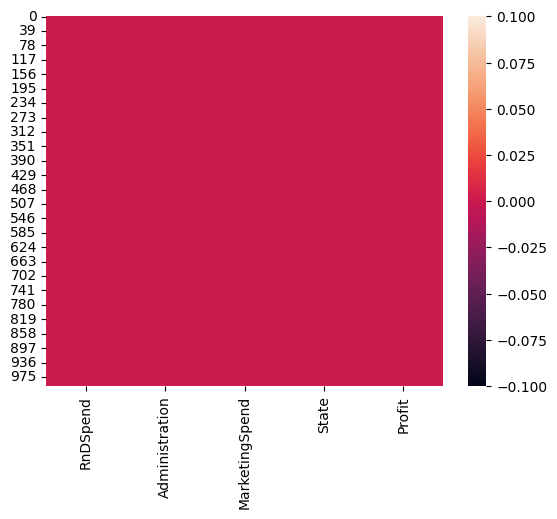

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,RnDSpend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_420\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

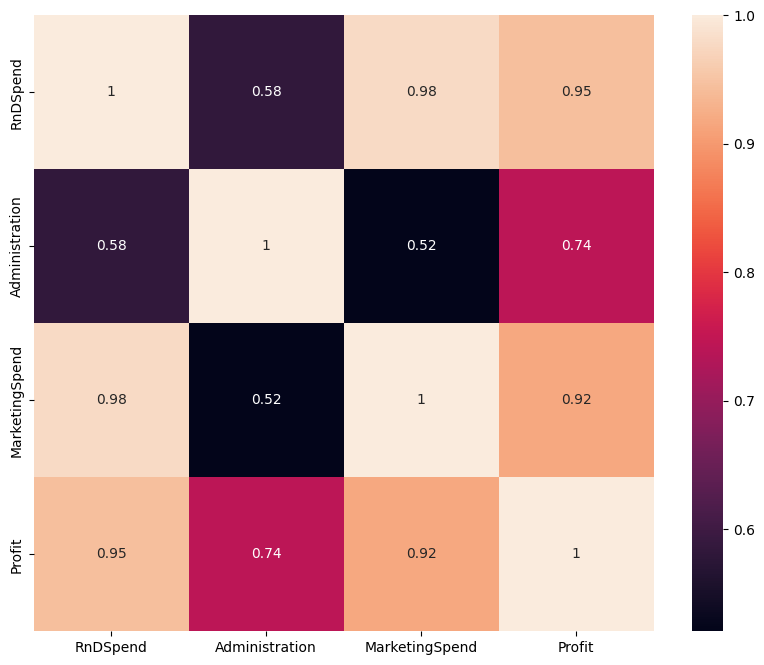

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Administrasi berdasarkan State

In [9]:
category = df.groupby('State').count()[['Administration']].sort_values(by='Administration',ascending=True).reset_index()
category = category.rename(columns={'Administration':'CategoryOfState'})

(array([0, 1, 2]),
 [Text(0, 0, 'Florida'), Text(1, 0, 'New York'), Text(2, 0, 'California')])

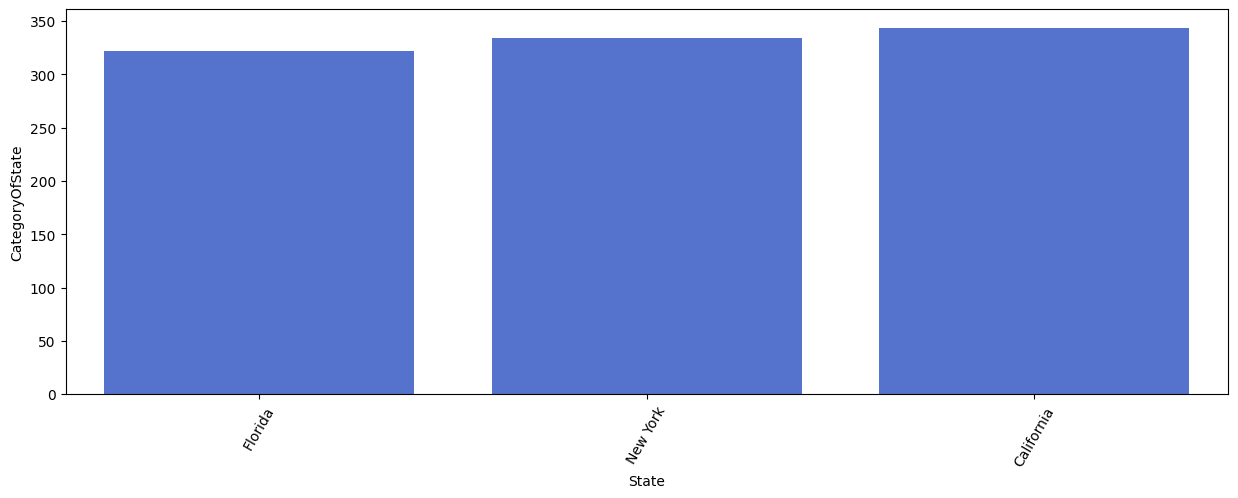

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['State'], y=category['CategoryOfState'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Marketing Spend

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_420\3081815855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MarketingSpend'])


<Axes: xlabel='MarketingSpend', ylabel='Density'>

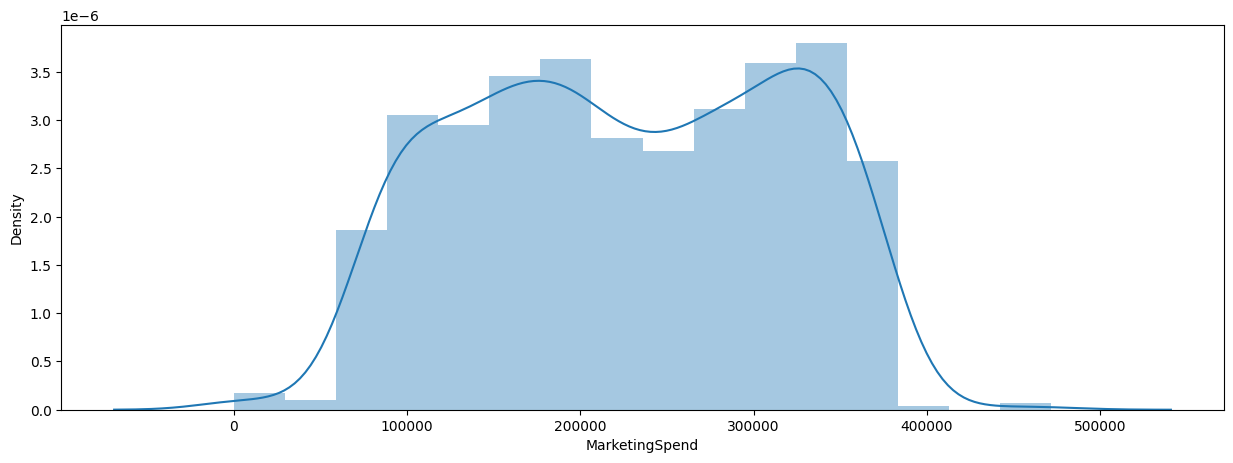

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['MarketingSpend'])

# distribusi Profit

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_420\2540017613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

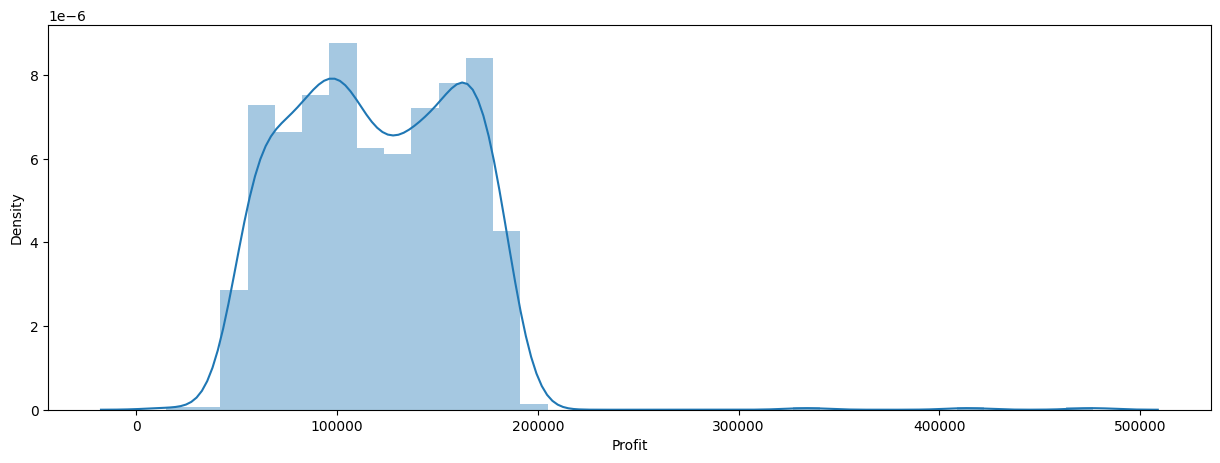

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['Profit'])

# seleksi fitur

In [14]:
features = ['RnDSpend','Administration','MarketingSpend']
x = df[features]
y = df['Profit']
x.shape, y.shape

((1000, 3), (1000,))

# split data training dan data testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(250,)

# membuat model regresi linier

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [17]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score ,'%')

akurasi model regresi linier =  0.9230348581861479 %


# membuat inputan model regresi linier

In [18]:
input_data = np.array([[165349.2,136897.8,471784.1]])

prediction = lr.predict(input_data) 
print('Estimasi Profit yang didapatkan perusahaan :', prediction)

Estimasi Profit yang didapatkan perusahaan : [198026.81004977]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [19]:
import pickle

filename = 'estimasi_profit.sav'
pickle.dump(lr,open(filename,'wb'))